# Prepare Environment

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from IPython.display import display

import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.8.0


# Prepare Classification Dataset

This section contains the steps to prepare our own dataset. Here we will create a dataset for classification.

## Download Images from the Internet

Collect and label a new dataset for at least 50 examples. The maximum number of classes is 3.

The classes for the dataset are:

*   Omurice
*   Curry
*   Ramen

Here we create a dictionary that can be used to convert from the class number into text.

In [3]:
class2text = {
    0: 'Omurice',
    1: 'Curry',
    2: 'Ramen',
}

In [4]:
class_names = [v for k, v in class2text.items()]

## Upload Images to Your Google Drive

Next we will upload the downloaded images into our Google Drive folder. You may create a new folder, named `food_dataset` and then uploaded the images into such folder.

## Create a Google Spreadsheet Containing a List of Images and Their Classes

Next we will create a Google Spreadsheet, consisting of TWO columns:

1.   `filename`: specify the filename of an image
2.   `class`: specify the class of an image (i.e., food type in this example)



## Mount Google Drive to Google Colab

Next we will connect our Google Colab to the `food_dataset` folder in Google Drive. This allows us to read/write files to/from the Google Drive.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then we specify the path to our `food_dataset` folder in Google Drive. If you created the `food_dataset` folder under `My Drive` folder. You can use the following path:

`data_dir = '/content/drive/My Drive/food_dataset'`

In [6]:
# e.g., data_dir = '/content/drive/My Drive/food_dataset'
data_dir = '/content/drive/My Drive/Colab Notebooks/data/japanfood_dataset'
num_classes = 3

You can use the following code to verify that you can reach the `food_dataset` folder from Google Colab. You should see the list of images, `train_dataset.csv` and `test_dataset.csv`.

In [7]:
!ls '$data_dir'

10.jpg	17.jpg	23.jpg	2.jpg	36.jpg	42.jpg	49.jpg	55.jpg	6.jpg
11.jpg	18.jpg	24.jpg	30.jpg	37.jpg	43.jpg	4.jpg	56.jpg	7.jpg
12.jpg	19.jpg	25.jpg	31.jpg	38.jpg	44.jpg	50.jpg	57.jpg	8.jpg
13.jpg	1.jpg	26.jpg	32.jpg	39.jpg	45.jpg	51.jpg	58.jpg	9.jpg
14.jpg	20.jpg	27.jpg	33.jpg	3.jpg	46.jpg	52.jpg	59.jpg	dataset.csv
15.jpg	21.jpg	28.jpg	34.jpg	40.jpg	47.jpg	53.jpg	5.jpg
16.jpg	22.jpg	29.jpg	35.jpg	41.jpg	48.jpg	54.jpg	60.jpg


# Load Classification Dataset

This section contains scripts to load the annotated (or labelled) images from the `food_dataset` folder. These data will used to train a model for food classification.

In [8]:
IMG_SIZE = (224, 224)

## Load Annotated Images

Here we define the function used to load the dataset.

In [9]:
from keras.preprocessing import image

def load_dataset(data_df):
    '''Function to load dataset.'''
    x = []
    y = []
    for i, r in data_df.iterrows():
        f = os.path.join(data_dir, r['filename'])   # filename
        c = r['class']                              # class

        # Load and resize the image
        img = image.load_img(f, target_size=IMG_SIZE)

        # Convert the Image object into a numpy array
        img = image.img_to_array(img)

        # Add to a list of images and classes
        x.append(img)
        y.append(c)
    x = np.asarray(x)
    y = np.asarray(y)
    return x, y

Next, we use the `load_dataset` function to load the training and test sets, according to the specification from `dataset.csv`.

In [10]:
# Load dataset
data_df = pd.read_csv(os.path.join(data_dir, 'dataset.csv'))
X, y = load_dataset(data_df)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42,
    test_size=0.2)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test, 
    random_state=42,
    test_size=0.5)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (48, 224, 224, 3), (48,)
Validation set: (6, 224, 224, 3), (6,)
Test set: (6, 224, 224, 3), (6,)


## Preprocessing

Next, we preprocess the data such that they can be used to train a model.

In [12]:
!pip install keras.utils 

In [13]:
from keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical

# Preprocess the input array
X_train = preprocess_input(X_train)
X_valid = preprocess_input(X_valid)
X_test = preprocess_input(X_test)

# Convert the preprocessing images into `float32`
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert the one-hot vector into `int`
y_train = y_train.astype(np.int)
X_valid = X_valid.astype(np.int)
y_test = y_test.astype(np.int)

print(f'Training Set: {X_train.shape}, {y_train.shape}')
print(f'Validation Set: {X_valid.shape}, {y_valid.shape}')
print(f'Test Set: {X_test.shape}, {y_test.shape}')

Training Set: (48, 224, 224, 3), (48,)
Validation Set: (6, 224, 224, 3), (6,)
Test Set: (6, 224, 224, 3), (6,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

# Transfer Learning

This section contains the steps to load the pretrained model, which is `MobileNetV2` in this example, and then replace to top layers with a new ones for food classification.

## Adjust the Existing Model for Classification: MobileNetV2 version.

---



First we need to load the existing `MobileNetV2` model, without the top layers.

In [14]:
from keras.applications.mobilenet_v2 import MobileNetV2

# Create the base pre-trained model
# Note: include_top=False --> do not include the top layers
#       This allows us to replace the top with new layers for transfer learning
base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),  # plus (3, ) for the color channel
    weights='imagenet',
    # weights=None,
    include_top=False)

In [15]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

Next we add new top layers that will classify the input images into types of food.

In [16]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()

# Start with the base_model
model.add(base_model)

# Add a global spatial average pooling layer
model.add(keras.layers.GlobalAveragePooling2D())

# A fully-connected layer
model.add(keras.layers.Dense(1024, activation='relu'))

# A softmax layer -- note that we have 5 classes
model.add(keras.layers.Dense(num_classes, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 3,572,803
Trainable params: 3,538,691
Non-trainable params: 34,112
_________________________________________________________________


Here we print the list of newly added layers in the model.

In [18]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 mobilenetv2_1.00_224
1 global_average_pooling2d
2 dense
3 dense_1


## Training Only Top Layers

Before we start fine-tuning the model, it is a common practice to first train only the newly added layers at the top of the model. This is because the top layers are *randomly initialized*, which may not work well with the currrent parameters of the pretrained model. We need to train the top layers to make it compatible with the features extracted from the layers below.

First, we train only the top layers by making all of the layers from `base_model` (i.e., MobileNetV2) not trainable.

In [19]:
# Freeze all layers in the MobileNetV2, except the ones we have just added.
for layer in base_model.layers:
    layer.trainable = False

Next, we configure the model for training.

In [20]:
epochs = 100
batch_size = 25
learning_rate = 0.001

# SGD optimizer (you can use others)
optimizer = keras.optimizers.SGD(lr=learning_rate)

# Cross-entropy loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Compile the model
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Let's start feeding the data to train the model and it will learn to classify food images.

In [21]:
hist = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    verbose=1)

Epoch 1/100
2/2 [==============================] - 8s 3s/step - loss: 1.3410 - accuracy: 0.3542 - val_loss: 1.0661 - val_accuracy: 0.1667
Epoch 2/100
2/2 [==============================] - 0s 133ms/step - loss: 1.2811 - accuracy: 0.4167 - val_loss: 1.0661 - val_accuracy: 0.1667
Epoch 3/100
2/2 [==============================] - 0s 165ms/step - loss: 1.2287 - accuracy: 0.4167 - val_loss: 1.0660 - val_accuracy: 0.1667
Epoch 4/100
2/2 [==============================] - 0s 216ms/step - loss: 1.1820 - accuracy: 0.4167 - val_loss: 1.0684 - val_accuracy: 0.1667
Epoch 5/100
2/2 [==============================] - 0s 138ms/step - loss: 1.1422 - accuracy: 0.4167 - val_loss: 1.0700 - val_accuracy: 0.1667
Epoch 6/100
2/2 [==============================] - 0s 194ms/step - loss: 1.1048 - accuracy: 0.4583 - val_loss: 1.0747 - val_accuracy: 0.1667
Epoch 7/100
2/2 [==============================] - 0s 132ms/step - loss: 1.0667 - accuracy: 0.4583 - val_loss: 1.0759 - val_accuracy: 0.1667
Epoch 8/100
2/2 

Here, we evaluate on the validation set.

In [22]:
# Predict the probability of each image
y_hat_valid_probs = model.predict(X_valid)

# Select the class with the highest probability as the predicted class.
y_hat_valid = np.argmax(y_hat_valid_probs, axis=-1)

print(y_hat_valid_probs.shape)
print(y_hat_valid.shape)

(6, 3)
(6,)


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid, average="macro"):.2f}')

Validation Set
[[0 0 2]
 [0 0 3]
 [0 0 1]]
Accuracy: 0.17
Macro F1-score: 0.10


## Fine-tuning Model

At this point, the top layers are well trained and we can start fine-tuning other layers from `MobileNetV2`.

Let's visualize layer names and layer indices to see how many layers we should freeze.

In [24]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

We can choose to freeze the bottom layers and train the remaining top layers, or finetune the entire model. The hyperparameter `n_freezes` in the script below is used to **control how many layers from the MobileNetV2 we would like to train**.

For example,

*   If we choose to train only the half blocks of the MobileNetV2 (i.e., freeze the first 144 layers and unfreeze the rest), we can set `n_freezes = 144`.
*   If we choose to train the entire model, we can set `n_freezes = 0`.

In [25]:
n_freezes = 0 #fine tuning to train entire model 

for layer in base_model.layers[:n_freezes]:
   layer.trainable = False
for layer in base_model.layers[n_freezes:]:
   layer.trainable = True

Next, we need to recompile the model for these modifications to take effect.

**Note**: During fine-tuning, it is a common practice to use a low learning rate.

In [26]:
epochs = 100 
batch_size = 25
learning_rate = 0.001

# We use SGD with a lower learning rate, compared to the training above
optimizer = keras.optimizers.SGD(lr=learning_rate)

# Cross-entropy loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Compile the model
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


We train our model again (this time fine-tuning some layers in MobileNetV2 as well).

In [27]:
hist = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    verbose=1)

Epoch 1/100
2/2 [==============================] - 8s 2s/step - loss: 0.8165 - accuracy: 0.7083 - val_loss: 1.2892 - val_accuracy: 0.1667
Epoch 2/100
2/2 [==============================] - 1s 317ms/step - loss: 0.7427 - accuracy: 0.7917 - val_loss: 1.2721 - val_accuracy: 0.1667
Epoch 3/100
2/2 [==============================] - 1s 351ms/step - loss: 0.7225 - accuracy: 0.7917 - val_loss: 1.2560 - val_accuracy: 0.1667
Epoch 4/100
2/2 [==============================] - 1s 320ms/step - loss: 0.6491 - accuracy: 0.8333 - val_loss: 1.2346 - val_accuracy: 0.1667
Epoch 5/100
2/2 [==============================] - 1s 315ms/step - loss: 0.5699 - accuracy: 0.8958 - val_loss: 1.2264 - val_accuracy: 0.1667
Epoch 6/100
2/2 [==============================] - 1s 315ms/step - loss: 0.5508 - accuracy: 0.8958 - val_loss: 1.2239 - val_accuracy: 0.1667
Epoch 7/100
2/2 [==============================] - 1s 314ms/step - loss: 0.6090 - accuracy: 0.8750 - val_loss: 1.2274 - val_accuracy: 0.1667
Epoch 8/100
2/2 

With the fine-tuning from the pretrained MobileNetV2, the performance on the test set should be better compared to starting from scratch.

In [28]:
# Predict the probability of each image
y_hat_valid_probs = model.predict(X_valid)

# Select the class with the highest probability as the predicted class.
y_hat_valid = np.argmax(y_hat_valid_probs, axis=-1)

print(y_hat_valid_probs.shape)
print(y_hat_valid.shape)

(6, 3)
(6,)


In [29]:
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid, average="macro"):.2f}')

Validation Set
[[0 0 2]
 [1 1 1]
 [0 0 1]]
Accuracy: 0.33
Macro F1-score: 0.30


In [30]:
# Predict the probability of each image
y_hat_test_probs = model.predict(X_test)

# Select the class with the highest probability as the predicted class.
y_hat_test = np.argmax(y_hat_test_probs, axis=-1)

print(y_hat_test_probs.shape)
print(y_hat_test.shape)

(6, 3)
(6,)


In [31]:
print('Test Set')
print(confusion_matrix(y_true=y_test, y_pred=y_hat_test))
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test, average="macro"):.2f}')

Test Set
[[2 0 0]
 [0 2 0]
 [1 1 0]]
Accuracy: 0.67
Macro F1-score: 0.53


# Test on Newly Downloaded Images

In this section, we will use our model to test on the new images that we are going to download from the Internet.

## Upload Files

The `upload_files` function below can be used to upload files.

In [32]:
from google.colab import files

def upload_files():
    uploaded = files.upload()
    for k, v in uploaded.items():
        open(k, 'wb').write(v)
    return list(uploaded.keys())

Run the following code block to upload your image files. This function returns a list of image paths which will be stored in `files`.

In [33]:
files = upload_files()

Saving Keema-Curry-1343-I-500x500.jpg to Keema-Curry-1343-I-500x500 (2).jpg


## Preprocessing

Before we can feed the images into the existing pretrained models, we need to preprocess such images into the format that such pretrained models have been trained on, which is `MobileNetV2` in this example.

[image Keema-Curry-1343-I-500x500.jpg]


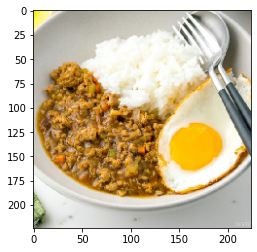

In [34]:
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input

images = []
for f in files:
    # Load and resize the image
    img = image.load_img(f, target_size=IMG_SIZE)

    # Convert the Image object into a numpy array
    img = image.img_to_array(img)

    # Add to a list of images
    images.append(img)

    # Visualize the resize image
    print(f'[image {f}]')
    plt.imshow(image.img_to_array(img).astype('uint8'))
    plt.show()
    plt.close("all")
images = np.asarray(images)

# Preprocess the input array
x = preprocess_input(images)

print(f"Image shape: {x.shape}")

## Classify Images

Then we use the finetuned `MobileNetV2` to determine the probabilities of food types that we defined.

In [35]:
from keras.applications.mobilenet_v2 import decode_predictions

# Feed the preprocessed, downloaded image to the pretrained VGG-16.
# The outputs are the probabilities of classes defined in ImageNet.
probs = model.predict(x)

# Display the results
for i in range(len(files)):
    print(f'[image {files[i]}]')
    for c in range(num_classes):
        print(f'{class2text[c]} ({probs[i][c]*100:.2f}%)')
    print('')

Image shape: (1, 224, 224, 3)
[image Keema-Curry-1343-I-500x500.jpg]
Omurice (6.42%)
Curry (88.81%)
Ramen (4.77%)



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


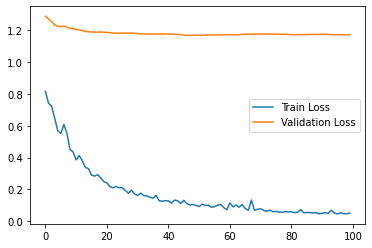

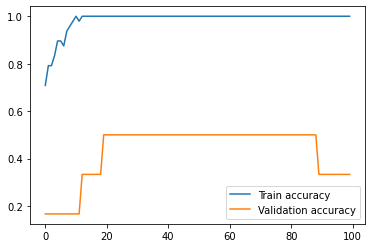

In [36]:
print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

## Adjust the Existing Model for Classification: ResNet50 version.


In [37]:
# Load dataset
data_df = pd.read_csv(os.path.join(data_dir, 'dataset.csv'))
X, y = load_dataset(data_df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42,
    test_size=0.2)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test, 
    random_state=42,
    test_size=0.5)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

# Preprocess the input array
X_train = preprocess_input(X_train)
X_valid = preprocess_input(X_valid)
X_test = preprocess_input(X_test)

# Convert the preprocessing images into `float32`
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert the one-hot vector into `int`
y_train = y_train.astype(np.int)
X_valid = X_valid.astype(np.int)
y_test = y_test.astype(np.int)

print(f'Training Set: {X_train.shape}, {y_train.shape}')
print(f'Validation Set: {X_valid.shape}, {y_valid.shape}')
print(f'Test Set: {X_test.shape}, {y_test.shape}')

Training set: (48, 224, 224, 3), (48,)
Validation set: (6, 224, 224, 3), (6,)
Test set: (6, 224, 224, 3), (6,)
Training Set: (48, 224, 224, 3), (48,)
Validation Set: (6, 224, 224, 3), (6,)
Test Set: (6, 224, 224, 3), (6,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

In [38]:
from tensorflow.keras.applications.resnet import ResNet50

# Create the base pre-trained model
# Note: include_top=False --> do not include the top layers
#       This allows us to replace the top with new layers for transfer learning
base_model = ResNet50(
    input_shape=IMG_SIZE + (3,),  # plus (3, ) for the color channel
    weights='imagenet',
    # weights=None,
    include_top=False)

In [39]:
base_model.summary()
model = Sequential()

# Start with the base_model
model.add(base_model)

# Add a global spatial average pooling layer
model.add(keras.layers.GlobalAveragePooling2D())

# A fully-connected layer
model.add(keras.layers.Dense(1024, activation='relu'))

# A softmax layer -- note that we have 5 classes
model.add(keras.layers.Dense(num_classes, activation='softmax'))

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 25,688,963
Trainable params: 25,635,843
Non-trainable params: 53,120
_________________________________________________________________


In [41]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 resnet50
1 global_average_pooling2d_1
2 dense_2
3 dense_3


In [42]:
for layer in base_model.layers:
    layer.trainable = False

In [43]:
epochs = 100
batch_size = 25
learning_rate = 0.001

# SGD optimizer (you can use others)
optimizer = keras.optimizers.SGD(lr=learning_rate)

# Cross-entropy loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Compile the model
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [44]:
hist = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    verbose=1)

Epoch 1/100
2/2 [==============================] - 8s 3s/step - loss: 1.2762 - accuracy: 0.3125 - val_loss: 1.1279 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 279ms/step - loss: 1.1567 - accuracy: 0.3125 - val_loss: 1.0834 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 264ms/step - loss: 1.1519 - accuracy: 0.2500 - val_loss: 1.0755 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 272ms/step - loss: 1.0832 - accuracy: 0.4375 - val_loss: 1.0863 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 266ms/step - loss: 1.0735 - accuracy: 0.4167 - val_loss: 1.0881 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 0s 274ms/step - loss: 1.0744 - accuracy: 0.3958 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 269ms/step - loss: 1.0559 - accuracy: 0.5000 - val_loss: 1.1026 - val_accuracy: 0.3333
Epoch 8/100
2/2 

In [45]:
# Predict the probability of each image
y_hat_valid_probs = model.predict(X_valid)

# Select the class with the highest probability as the predicted class.
y_hat_valid = np.argmax(y_hat_valid_probs, axis=-1)

print(y_hat_valid_probs.shape)
print(y_hat_valid.shape)

(6, 3)
(6,)


In [46]:
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid, average="macro"):.2f}')

Validation Set
[[2 0 0]
 [3 0 0]
 [1 0 0]]
Accuracy: 0.33
Macro F1-score: 0.17


In [47]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [48]:
n_freezes = 0 #fine tuning to train entire model 

for layer in base_model.layers[:n_freezes]:
   layer.trainable = False
for layer in base_model.layers[n_freezes:]:
   layer.trainable = True

In [49]:
epochs = 100
batch_size = 25
learning_rate = 0.001

# We use SGD with a lower learning rate, compared to the training above
optimizer = keras.optimizers.SGD(lr=learning_rate)

# Cross-entropy loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Compile the model
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [50]:
hist = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    verbose=1)

Epoch 1/100
2/2 [==============================] - 10s 3s/step - loss: 1.1456 - accuracy: 0.3750 - val_loss: 1.5996 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 1s 634ms/step - loss: 0.9705 - accuracy: 0.5000 - val_loss: 1.6401 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 1s 630ms/step - loss: 0.9014 - accuracy: 0.6250 - val_loss: 1.6519 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 1s 640ms/step - loss: 0.8100 - accuracy: 0.7292 - val_loss: 1.6418 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 1s 633ms/step - loss: 0.7193 - accuracy: 0.8333 - val_loss: 1.6303 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 1s 631ms/step - loss: 0.6708 - accuracy: 0.8542 - val_loss: 1.6084 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 1s 635ms/step - loss: 0.6297 - accuracy: 0.9167 - val_loss: 1.5829 - val_accuracy: 0.3333
Epoch 8/100
2/2

In [51]:
# Predict the probability of each image
y_hat_valid_probs = model.predict(X_valid)

# Select the class with the highest probability as the predicted class.
y_hat_valid = np.argmax(y_hat_valid_probs, axis=-1)

print(y_hat_valid_probs.shape)
print(y_hat_valid.shape)

(6, 3)
(6,)


In [52]:
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid, average="macro"):.2f}')

Validation Set
[[2 0 0]
 [3 0 0]
 [1 0 0]]
Accuracy: 0.33
Macro F1-score: 0.17


In [53]:
# Predict the probability of each image
y_hat_test_probs = model.predict(X_test)

# Select the class with the highest probability as the predicted class.
y_hat_test = np.argmax(y_hat_test_probs, axis=-1)

print(y_hat_test_probs.shape)
print(y_hat_test.shape)

(6, 3)
(6,)


In [54]:
print('Test Set')
print(confusion_matrix(y_true=y_test, y_pred=y_hat_test))
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test, average="macro"):.2f}')

Test Set
[[1 0 1]
 [1 0 1]
 [0 0 2]]
Accuracy: 0.50
Macro F1-score: 0.39


[image Keema-Curry-1343-I-500x500.jpg]


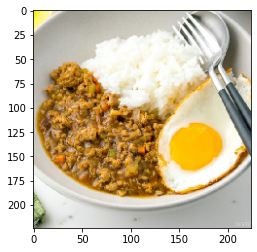

Image shape: (1, 224, 224, 3)
[image Keema-Curry-1343-I-500x500.jpg]
Omurice (23.93%)
Curry (23.87%)
Ramen (52.21%)



In [55]:
from tensorflow.keras.applications.resnet import decode_predictions

images = []
for f in files:
    # Load and resize the image
    img = image.load_img(f, target_size=IMG_SIZE)

    # Convert the Image object into a numpy array
    img = image.img_to_array(img)

    # Add to a list of images
    images.append(img)

    # Visualize the resize image
    print(f'[image {f}]')
    plt.imshow(image.img_to_array(img).astype('uint8'))
    plt.show()
    plt.close("all")
images = np.asarray(images)

# Preprocess the input array
x = preprocess_input(images)

print(f"Image shape: {x.shape}")
# Feed the preprocessed, downloaded image to the pretrained VGG-16.
# The outputs are the probabilities of classes defined in ImageNet.
probs = model.predict(x)

# Display the results
for i in range(len(files)):
    print(f'[image {files[i]}]')
    for c in range(num_classes):
        print(f'{class2text[c]} ({probs[i][c]*100:.2f}%)')
    print('')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


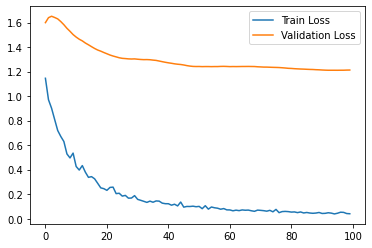

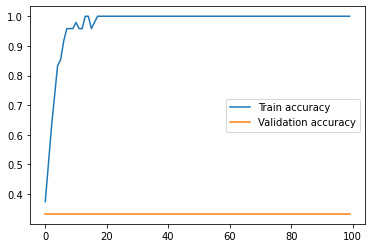

In [56]:
print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

## Adjust the Existing Model for Classification: VGG16 version.

In [57]:
# Load dataset
data_df = pd.read_csv(os.path.join(data_dir, 'dataset.csv'))
X, y = load_dataset(data_df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42,
    test_size=0.2)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test, 
    random_state=42,
    test_size=0.5)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

# Preprocess the input array
X_train = preprocess_input(X_train)
X_valid = preprocess_input(X_valid)
X_test = preprocess_input(X_test)

# Convert the preprocessing images into `float32`
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert the one-hot vector into `int`
y_train = y_train.astype(np.int)
X_valid = X_valid.astype(np.int)
y_test = y_test.astype(np.int)

print(f'Training Set: {X_train.shape}, {y_train.shape}')
print(f'Validation Set: {X_valid.shape}, {y_valid.shape}')
print(f'Test Set: {X_test.shape}, {y_test.shape}')

Training set: (48, 224, 224, 3), (48,)
Validation set: (6, 224, 224, 3), (6,)
Test set: (6, 224, 224, 3), (6,)
Training Set: (48, 224, 224, 3), (48,)
Validation Set: (6, 224, 224, 3), (6,)
Test Set: (6, 224, 224, 3), (6,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

In [58]:
from tensorflow.keras.applications.vgg16 import VGG16

# Create the base pre-trained model
# Note: include_top=False --> do not include the top layers
#       This allows us to replace the top with new layers for transfer learning
base_model = VGG16(
    input_shape=IMG_SIZE + (3,),  # plus (3, ) for the color channel
    weights='imagenet',
    # weights=None,
    include_top=False)

In [59]:
base_model.summary()
model = Sequential()

# Start with the base_model
model.add(base_model)

# Add a global spatial average pooling layer
model.add(keras.layers.GlobalAveragePooling2D())

# A fully-connected layer
model.add(keras.layers.Dense(1024, activation='relu'))

# A softmax layer -- note that we have 5 classes
model.add(keras.layers.Dense(num_classes, activation='softmax'))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1024)              525312    
                                                                 
 dense_5 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 15,243,075
Trainable params: 15,243,075
Non-trainable params: 0
_________________________________________________________________


In [61]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 vgg16
1 global_average_pooling2d_2
2 dense_4
3 dense_5


In [62]:
for layer in base_model.layers:
    layer.trainable = False

In [63]:
epochs = 100
batch_size = 25
learning_rate = 0.001

# SGD optimizer (you can use others)
optimizer = keras.optimizers.SGD(lr=learning_rate)

# Cross-entropy loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Compile the model
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [64]:
hist = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    verbose=1)

Epoch 1/100
2/2 [==============================] - 9s 4s/step - loss: 1.2260 - accuracy: 0.3125 - val_loss: 1.0644 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 423ms/step - loss: 1.1907 - accuracy: 0.3125 - val_loss: 1.0624 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 419ms/step - loss: 1.1656 - accuracy: 0.3125 - val_loss: 1.0629 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 424ms/step - loss: 1.1463 - accuracy: 0.3125 - val_loss: 1.0655 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 1s 411ms/step - loss: 1.1305 - accuracy: 0.3125 - val_loss: 1.0697 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 1s 418ms/step - loss: 1.1197 - accuracy: 0.3125 - val_loss: 1.0749 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 1s 419ms/step - loss: 1.1112 - accuracy: 0.3333 - val_loss: 1.0796 - val_accuracy: 0.5000
Epoch 8/100
2/2 

In [65]:
# Predict the probability of each image
y_hat_valid_probs = model.predict(X_valid)

# Select the class with the highest probability as the predicted class.
y_hat_valid = np.argmax(y_hat_valid_probs, axis=-1)

print(y_hat_valid_probs.shape)
print(y_hat_valid.shape)

(6, 3)
(6,)


In [66]:
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid, average="macro"):.2f}')

Validation Set
[[2 0 0]
 [3 0 0]
 [1 0 0]]
Accuracy: 0.33
Macro F1-score: 0.17


In [67]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_3
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [68]:
n_freezes = 0 #fine tuning to train entire model 

for layer in base_model.layers[:n_freezes]:
   layer.trainable = False
for layer in base_model.layers[n_freezes:]:
   layer.trainable = True

In [69]:
epochs = 100
batch_size = 25
learning_rate = 0.001

# We use SGD with a lower learning rate, compared to the training above
optimizer = keras.optimizers.SGD(lr=learning_rate)

# Cross-entropy loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Compile the model
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [70]:
hist = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    verbose=1)

Epoch 1/100
2/2 [==============================] - 10s 5s/step - loss: 0.9695 - accuracy: 0.6875 - val_loss: 1.0767 - val_accuracy: 0.1667
Epoch 2/100
2/2 [==============================] - 2s 870ms/step - loss: 0.9599 - accuracy: 0.7500 - val_loss: 1.0765 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 2s 874ms/step - loss: 0.9484 - accuracy: 0.7500 - val_loss: 1.0746 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 2s 868ms/step - loss: 0.9415 - accuracy: 0.7292 - val_loss: 1.0721 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 2s 878ms/step - loss: 0.9313 - accuracy: 0.8125 - val_loss: 1.0719 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 2s 877ms/step - loss: 0.9220 - accuracy: 0.7500 - val_loss: 1.0712 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 2s 876ms/step - loss: 0.9129 - accuracy: 0.8125 - val_loss: 1.0689 - val_accuracy: 0.3333
Epoch 8/100
2/2

In [71]:
# Predict the probability of each image
y_hat_valid_probs = model.predict(X_valid)

# Select the class with the highest probability as the predicted class.
y_hat_valid = np.argmax(y_hat_valid_probs, axis=-1)

print(y_hat_valid_probs.shape)
print(y_hat_valid.shape)

(6, 3)
(6,)


In [72]:
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid, average="macro"):.2f}')

Validation Set
[[2 0 0]
 [3 0 0]
 [1 0 0]]
Accuracy: 0.33
Macro F1-score: 0.17


In [73]:
# Predict the probability of each image
y_hat_test_probs = model.predict(X_test)

# Select the class with the highest probability as the predicted class.
y_hat_test = np.argmax(y_hat_test_probs, axis=-1)

print(y_hat_test_probs.shape)
print(y_hat_test.shape)

(6, 3)
(6,)


In [74]:
print('Test Set')
print(confusion_matrix(y_true=y_test, y_pred=y_hat_test))
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test, average="macro"):.2f}')

Test Set
[[1 0 1]
 [1 1 0]
 [0 0 2]]
Accuracy: 0.67
Macro F1-score: 0.66


[image Keema-Curry-1343-I-500x500.jpg]


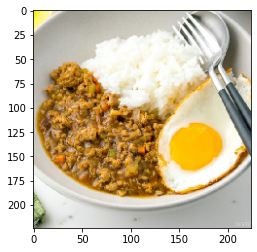

Image shape: (1, 224, 224, 3)
[image Keema-Curry-1343-I-500x500.jpg]
Omurice (39.00%)
Curry (57.08%)
Ramen (3.92%)



In [75]:
from tensorflow.keras.applications.vgg16 import decode_predictions

images = []
for f in files:
    # Load and resize the image
    img = image.load_img(f, target_size=IMG_SIZE)

    # Convert the Image object into a numpy array
    img = image.img_to_array(img)

    # Add to a list of images
    images.append(img)

    # Visualize the resize image
    print(f'[image {f}]')
    plt.imshow(image.img_to_array(img).astype('uint8'))
    plt.show()
    plt.close("all")
images = np.asarray(images)

# Preprocess the input array
x = preprocess_input(images)

print(f"Image shape: {x.shape}")
# Feed the preprocessed, downloaded image to the pretrained VGG-16.
# The outputs are the probabilities of classes defined in ImageNet.
probs = model.predict(x)

# Display the results
for i in range(len(files)):
    print(f'[image {files[i]}]')
    for c in range(num_classes):
        print(f'{class2text[c]} ({probs[i][c]*100:.2f}%)')
    print('')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


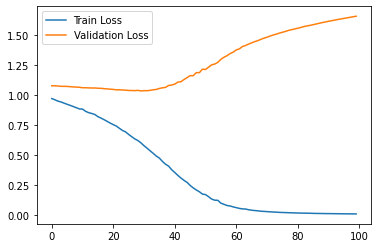

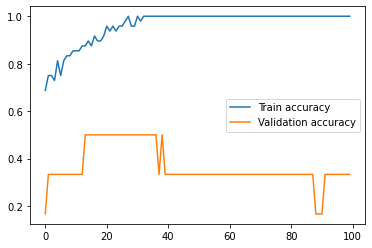

In [76]:
print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

Results:

* MobileNetV2 - Accuracy: 0.67 | Macro F1-score: 0.53 | Curry Picture deducted as Curry (88.81%)
* ResNet50 - Accuracy: 0.50 | Macro F1-score: 0.39 | Curry Picture deducted as Curry (23.87%)
* VGG16 - Accuracy: 0.67 | Macro F1-score: 0.66 | Curry Picture deducted as Curry (57.08%)

For the parameters, I chose to use the epoches = 100, along with the batch_size = 25 as the optimum settings in order test the balance performance in each model. 

By doing the comparison of the classification for chosen deep learning models (MobileNetV2, ResNet50, and VGG16). I have selected the MobileNetV2 as the best model as it holds the overall better test scores compared to ResNet50 and VGG16. MobileNetV2 were preferably a lightweight model with less complexibility model size and faster accuracy to compute. 

For the extra part, I'm going to try performing Hyperparameter optimization using optuna with the chosen model (MobileNetV2) as well.

# Hyperparameter Optimization with Optuna

In [77]:
!pip install optuna

In [78]:
import optuna
from keras.models import Model

def create_model(trial):
    
    # Hyperparameters to be tuned by Optuna.
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
    momentum = trial.suggest_float("momentum", 0.0, 1.0)
    
    base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),  # plus (3, ) for the color channel
    weights='imagenet',
    # weights=None,
    include_top=False)
    x = base_model.output
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(350, activation='relu')(x)
    predictions = Dense(3, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    # Compile model.
    model.compile(
        optimizer= keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True),
        loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=["accuracy"],
    )

    return model

In [79]:
def objective(trial):

  # Metrics to be monitored by Optuna.
  if tf.__version__ >= "2":
      monitor = "val_accuracy"
  else:
      monitor = "val_acc"

  model = create_model(trial)

  hist = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    verbose=1)
  
  return hist.history[monitor][-1]

In [80]:
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=3)

[I 2022-04-07 09:08:43,122] A new study created in memory with name: no-name-2948e74c-9a0e-479f-a826-e8be3e2e16df


Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 1.3781 - accuracy: 0.3125 - val_loss: 1.5060 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 148ms/step - loss: 0.7605 - accuracy: 0.6875 - val_loss: 1.5456 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 140ms/step - loss: 0.3784 - accuracy: 1.0000 - val_loss: 1.5654 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 208ms/step - loss: 0.1790 - accuracy: 1.0000 - val_loss: 1.5783 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 142ms/step - loss: 0.1316 - accuracy: 1.0000 - val_loss: 1.5789 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 161ms/step - loss: 0.0925 - accuracy: 1.0000 - val_loss: 1.5753 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 154ms/step - loss: 0.0637 - accuracy: 1.0000 - val_loss: 1.5703 - val_accuracy: 0.5000
Epoch 8/100
2/2 

[I 2022-04-07 09:09:30,030] Trial 0 finished with value: 0.5 and parameters: {'learning_rate': 0.00013188094987546143, 'momentum': 0.7439151629707293}. Best is trial 0 with value: 0.5.


Epoch 1/100
2/2 [==============================] - 5s 1s/step - loss: 4.8326 - accuracy: 0.3750 - val_loss: 15.0135 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 137ms/step - loss: 1.0205 - accuracy: 0.9375 - val_loss: 12.8726 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 127ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 13.2240 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 127ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 13.2717 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 162ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 13.2275 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 124ms/step - loss: 9.2638e-04 - accuracy: 1.0000 - val_loss: 13.1544 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 128ms/step - loss: 7.1209e-04 - accuracy: 1.0000 - val_loss: 13.0767 - val_accuracy: 0.5000
E

[I 2022-04-07 09:10:15,809] Trial 1 finished with value: 0.5 and parameters: {'learning_rate': 0.019141982664879147, 'momentum': 0.5889466101421929}. Best is trial 0 with value: 0.5.


Epoch 1/100
2/2 [==============================] - 4s 1s/step - loss: 9.4443 - accuracy: 0.4375 - val_loss: 65.3443 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 144ms/step - loss: 24.5339 - accuracy: 0.6667 - val_loss: 52.2003 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 138ms/step - loss: 33.7329 - accuracy: 0.7708 - val_loss: 764.9816 - val_accuracy: 0.1667
Epoch 4/100
2/2 [==============================] - 0s 133ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1212.4562 - val_accuracy: 0.1667
Epoch 5/100
2/2 [==============================] - 0s 128ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1537.7196 - val_accuracy: 0.1667
Epoch 6/100
2/2 [==============================] - 0s 132ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1756.6705 - val_accuracy: 0.1667
Epoch 7/100
2/2 [==============================] - 0s 124ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1895.3739 - val

[I 2022-04-07 09:11:01,167] Trial 2 finished with value: 0.1666666716337204 and parameters: {'learning_rate': 0.04772382657828746, 'momentum': 0.8087750512124767}. Best is trial 0 with value: 0.5.


In [81]:
print(study.best_trial)

FrozenTrial(number=0, values=[0.5], datetime_start=datetime.datetime(2022, 4, 7, 9, 8, 43, 131225), datetime_complete=datetime.datetime(2022, 4, 7, 9, 9, 30, 30010), params={'learning_rate': 0.00013188094987546143, 'momentum': 0.7439151629707293}, distributions={'learning_rate': LogUniformDistribution(high=0.1, low=0.0001), 'momentum': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)


In [82]:
#best parameter combination
print(study.best_params)

#score achieved with best parameter combination
print(study.best_value)

{'learning_rate': 0.00013188094987546143, 'momentum': 0.7439151629707293}
0.5


Shared dataset folder: https://drive.google.com/drive/folders/1aevls6GX8bkQb2QYkR26VAPbOfIGV8qy?usp=sharing